# Cats/Dogs Image Classification using Transfer Learning(ResNet) in PyTorch

In [1]:
import os
import torch
import torchvision
import tarfile
import torchvision.transforms as T
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer
import matplotlib.pyplot as plt

from toloka_monitoring.ml.model import ImageClassifier
from toloka_monitoring.ml.data import CatsVsDogsDataModule, transforms


In [2]:
%load_ext autoreload
%autoreload 2

# Load data


In [3]:
if not os.path.exists('../data/dogscats'):
    # Dowload the dataset
    dataset_url = "https://files.fast.ai/data/examples/dogscats.tgz"
    download_url(dataset_url, '../data')
    with tarfile.open('../data/dogscats.tgz', "r:gz") as f:
        f.extractall('../data')



In [4]:
datamodule = CatsVsDogsDataModule('../data/dogscats',
                                  train_transform=transforms,
                                  test_transform=transforms)
datamodule.setup()

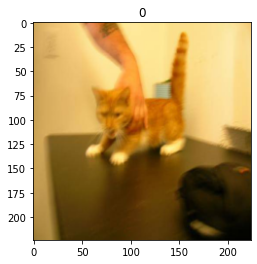

In [5]:
example = datamodule.train[0]
plt.figure()
plt.imshow(example[0].permute(1, 2, 0))
plt.title(example[1])
plt.show()


# Train model

In [6]:
model = ImageClassifier()

In [7]:
trainer = Trainer(
    gpus=1 if torch.cuda.is_available() else 0,
    max_epochs=10,
)

trainer.fit(model, datamodule)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/Users/btseytlin/.pyenv/versions/3.8.12/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(

  | Name  | Type             | Params
-------------------------------------------
0 | trunk | ResNet           | 11.7 M
1 | head  | Linear           | 2.0 K 
2 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
2.0 K     Trainable params
11.7 M    Non-trainable params
11.7 M    Total params
46.766    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/Users/btseytlin/.pyenv/versions/3.8.12/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:685: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [8]:
trainer.save_checkpoint("../models/model.ckpt")